# Tensor Flow and MNIST Data Set 

## TensorFlow 

In this note I use [MNIST Data Set](http://yann.lecun.com/exdb/mnist/) to learn how to use TensorFlow. 
    {% asset_img output_26_1.png %}

Firstly we'll briefly go through the installation and common elements of TensorFlow. Then we will start to input the MNIST data, and use Matplotlib to display some of our MNIST images. Then we start to construct our TensorFlow model with cross entropy error measure and gradient descent optimization. Finally we will compare our output y to test dataset to estimate our model performance.



### Installation of TensorFlow for Winodws 10

As TensorFlow is not compatible with Windows 10, we need to install TensorFlow into a virtual environment. The following steps indicates how to do this with Anaconda.
    1. Install [Anaconda](https://www.anaconda.com/distribution/)
    2. Open 'Anaconda Prompt'
    3. Create a vitrual environment named 'virtualEnv' with anaconda:
    ``` Bash
    conda create --name virtualEnv python=3.6 anaconda
    ```
    After the packages are installed, we can use these commands to activate / deactivate the virtual environment:
    ``` Bash
    conda activate virtualEnv
    conda deactivate
    ```
    4. Install Tensorflow in virtualEnv:
    ``` Bash
    conda install tensorflow
    ```
    Then we finised TensorFlow installation.

Test: 
    After TensorFlow installed, we can active the 'virtualEnv', and type the code below in to Jupyter Notebook:
    ``` Python
    import tensorflow as tf
    ```
    If no error / warning occurs, then it means we already installed TensorFlow correctly.

Reference: <https://makerpro.cc/2019/01/introduction-of-ai-experiments-and-the-installation-of-tensorflow-in-windows-system/>



### Import TF

In [114]:
import tensorflow as tf

### TF Elements

1. Simple Constants

In [115]:
x = tf.constant(100)

2. Running Sessions

In [116]:
sess = tf.Session()
sess.run(x)

100

To line up multiple Tensorflow operations in a session:

In [117]:
with tf.Session() as sess:
    print(x ** 2)
    print(x + 4)

Tensor("pow_1:0", shape=(), dtype=int32)
Tensor("add_4:0", shape=(), dtype=int32)


3. Place Holder

When we don't know the constants right now (for example, batch input need to update x and y for each iteration), we can declare place holder and use '**feed_dict={x:`x_batch`, y:`y_batch`}**'later to fed in the data.

In [118]:
x = tf.placeholder(tf.int32)
y = tf.placeholder(tf.int32)

4. Defining Operations

In [119]:
add = tf.add(x,y)
sub = tf.subtract(x,y)
mul = tf.multiply(x,y)

Example of use placeholder with operation objects:

In [120]:
d = {x:20,y:30}
with tf.Session() as sess:
    print('Operations with Constants')
    print('Addition',sess.run(add,feed_dict=d))
    print('Subtraction',sess.run(sub,feed_dict=d))
    print('Multiplication',sess.run(mul,feed_dict=d))

Operations with Constants
Addition 50
Subtraction -10
Multiplication 600


## Get the MNIST Data

### MNIST data
    [!Office Website](http://yann.lecun.com/exdb/mnist/)
    [!Chinese Data Source](https://scidm.nchc.org.tw/dataset/mnist)

data sets: (datasize by 'mnist.train.num_examples')
    
    mnist.train 55000    
    mnist.test 10000    
    mnist.validation 5000

image and label:
    
    X = mnist.train.images    
    y = mnist.train.label

type(mnist):

    tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [121]:
import tensorflow as tf

In [122]:
from tensorflow.examples.tutorials.mnist import input_data

In [123]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Visualizing the Data

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline

In [125]:
mnist.train.images[0].shape

(784,)

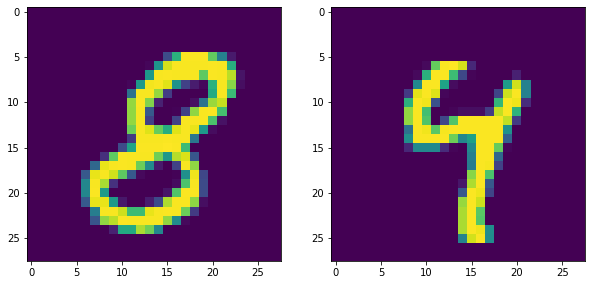

In [130]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(mnist.train.images[5].reshape(28,28))
plt.subplot(1,2,2)
plt.imshow(mnist.train.images[2].reshape(28,28))

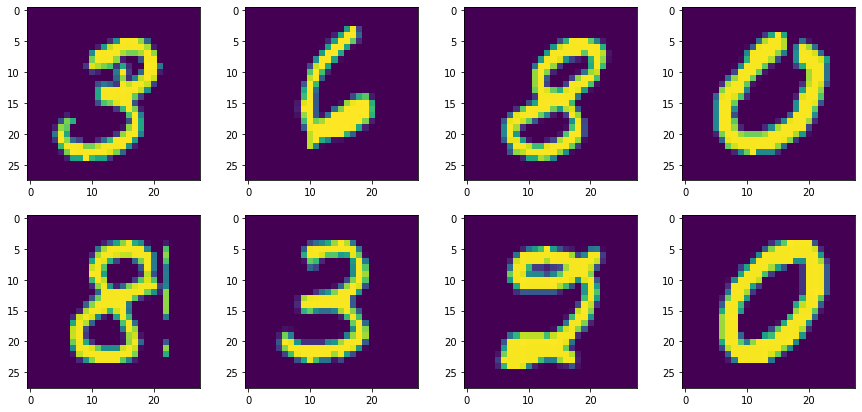

In [156]:
plt.figure(figsize=(15, 7))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(mnist.train.images[2*i+1].reshape(28,28))

In [75]:
mnist.train.labels[5]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [76]:
mnist.train.labels[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [80]:
mnist.train.images[8].max()

1.0

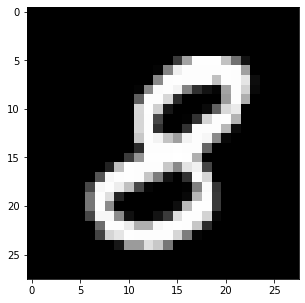

In [157]:
plt.figure(figsize=(10, 5))
plt.imshow(mnist.train.images[5].reshape(28,28),cmap='gist_gray')

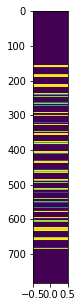

In [144]:
plt.figure(figsize=(12, 5))
plt.imshow(mnist.train.images[5].reshape(784,1),aspect=0.01)

## Create the Model

**Variable Objects**
    
    tf.placeholder
    
    tf.Variable
    
**Math Operation Objects**
  
    tf.matmul
    
    tf.reduce_mean(array, axis)
        return the mean value in each vector
    tf.reduce_mean(array, axis)
        return the max value in each vector
        
    tf.argmax(input, axis(=0:row; =1:column)) 
        if input=array, return the index of max value in each vector
        if input=vector, return the index of max value in the vector
        
    tf.equal(input, pred)
        return True of False for each element comparsion. The dim. of return is same as input array's dim.
    
    tf.nn.softmax_cross_entropy_with_logits_v2
    tf.train.GradientDescentOptimizer
    tf.train.GradientDescentOptimizer.minimize
    tf.global_variables_initializer
    
   

In [84]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [85]:
# 10 because 0-9 possible numbers
W = tf.Variable(tf.zeros([784,10]))

In [86]:
b = tf.Variable(tf.zeros([10]))

In [87]:
# Output = Possibility 
y = tf.matmul(x,W) + b 

Loss and Optimizer

In [88]:
y_true = tf.placeholder(tf.float32,[None,10])

In [89]:
# Cross Entropy
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y))
# Use Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
# Train
train = optimizer.minimize(cross_entropy)

### Create Session

Everything except of variables (**constants** and **placeholders**) do not require initialization . 
But **Variable (even if it is a constant)** should be initialized. 

In [90]:
init = tf.global_variables_initializer()

A Session object encapsulates the environment in which **Operation objects are executed, and Tensor objects are evaluated**.

In [111]:
with tf.Session() as sess:
    sess.run(init)
    
    # Train the model for 1000 steps on the training set
    # Using built in batch feeder from mnist for convenience
    
    for step in range(1000):
        
        batch_x , batch_y = mnist.train.next_batch(100)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
        
    # Test the Train Model
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1)) 
   
    acc = tf.reduce_mean(tf.cast(matches,tf.float32)) 

    
    print(sess.run(tf.reduce_max(y,1), feed_dict={x:mnist.test.images}))
    print(sess.run(tf.argmax(y,1), feed_dict={x:mnist.test.images}))
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

[10.566967  10.0331335  6.0711703 ...  8.382192   7.064541  12.832104 ]
[7 2 1 ... 4 5 6]
0.9139


## Reference:

<https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/>

<https://www.tensorflow.org/api_docs/python/tf/math/argmax)>

<https://stackoverflow.com/questions/34987509/tensorflow-max-of-a-tensor-along-an-axis>
